# AutoSleep Data 


In [615]:
import pandas as pd
import numpy as np 


# First we need to import our data from a csv file: 
df = pd.read_csv("AutoSleep.csv", header=0)
days_df = pd.read_csv("days_of_week.csv", header=0)

test_df = pd.read_csv("AutoSleep_test.csv", header=0)
days_test_df = pd.read_csv("days_test.csv", header=0)

## Explore the Data & Handle Missing Values
* With this dataset, it appears that the nights I wasn't wearing my watch were not recorded so there are no missing values
* There are, however, `np.NaN` values in the columns tracking blood oxygen levels because my Apple Watch doesn't have that capability. 
    * Since this data is missing throughout the entire time interval of the dataset, I will be deleting those rows from the dataframe.
* This is nice except when I want to compare it so another source of data, it will be a little more difficult to combine 
without filling in the missing dates on the autosleep data or removing those dates from the other dataset. 


In [616]:
# What are the column names?
# print(df.columns)
# It might be useful if I make a table that translates some of the column nates such as "ISO8601" and "qualityAvg7"

# print(df.head(5))
# print(df.tail(5))

# this for loop returns true if a column has any null values
for col in df:
    check_for_nan = df[col].isnull().values.any()
    if check_for_nan == True:
        # print (col, check_for_nan, df[col].isnull().count())
        df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)

df.drop(['ISO8601', 'toDate', 'inBed',
       'awake', 'fellAsleepIn', 'sessions', 'asleepAvg7', 'efficiencyAvg7', 
       'qualityAvg7', 'sleepBPMAvg7', 'wakingBPMAvg7','hrvAvg7'], axis=1, inplace=True)

test_df.drop(['ISO8601', 'toDate', 'inBed',
       'awake', 'fellAsleepIn', 'sessions', 'asleepAvg7', 'efficiencyAvg7', 
       'qualityAvg7', 'sleepBPMAvg7', 'wakingBPMAvg7','hrvAvg7'], axis=1, inplace=True)


The following Columns have missing values for every instance in the dataset:
* deep 
* deepAvg7 
* dayBPM 
* dayBPMAvg7 
* SpO2Avg 
* SpO2Min 
* SpO2Max 
* respAvg 
* respMin 
* respMax 
* tags 
* notes 

## Now for some Summary Statistics: 
* Summarize the following into a pandas Series:
    * `nights_total` = total number nights logged
    * `avg_sleep` = average sleep 
    * `avg_[day]` = average sleep for each day of the week
    * `std_sleep` = standard deviation of sleep 
    * `std_[day]` = standard deviation for each day of the week
    * `mode_hours` = most common sleep length (rounded to the nearest hour)
    * `mode_day` = most common day of the week when mode sleep length occurred


In [617]:
# collecting summary statistics:
import utils 
import importlib
importlib.reload(utils)

summary_stats = []

# 1. total number of nights logged
nights_total = df.shape[0]
summary_stats.append(nights_total)

# 2. average hours slept
# we need to convert the timestamps into numeric values before we can calculate the mean
clean_df = utils.clean_sleep(df, "asleep")
test_df = utils.clean_sleep(test_df, 'asleep')
sleep_ser = clean_df["asleep"]   
avg_sleep_secs = sleep_ser.mean()
avg_sleep = utils.sec_to_hours(avg_sleep_secs)
median_sleep_secs = sleep_ser.median()
median_sleep = utils.sec_to_hours(median_sleep_secs)
print("average time slept:", avg_sleep, "median:", median_sleep)
summary_stats.append(avg_sleep)

# 3. average sleep for each day of the week
days_of_week = utils.separate_days(df)
week_df = pd.DataFrame(days_of_week)
print(week_df)
avg_monday = utils.sec_to_hours(week_df["Monday"].dropna().mean())
avg_tuesday =  utils.sec_to_hours(week_df["Tuesday"].dropna().mean())
print("TUESDAY", avg_tuesday)
avg_wednesday =  utils.sec_to_hours(week_df["Wednesday"].dropna().mean())
avg_thursday =  utils.sec_to_hours(week_df["Thursday"].dropna().mean())
avg_friday =  utils.sec_to_hours(week_df["Friday"].dropna().mean())
avg_saturday =  utils.sec_to_hours(week_df["Saturday"].dropna().mean())
avg_sunday =  utils.sec_to_hours(week_df["Sunday"].dropna().mean())
summary_stats.append([avg_monday, avg_tuesday, avg_wednesday, avg_thursday, avg_friday, avg_saturday, avg_sunday])

# 4. standard deviation of sleep
std_sleep = utils.sec_to_hours(sleep_ser.std())
summary_stats.append(std_sleep)
print("STD:", std_sleep)

#5. standard deviation for each day of the week
std_mon = utils.sec_to_hours(week_df["Monday"].dropna().std())
std_tues = utils.sec_to_hours(week_df["Tuesday"].dropna().std())
std_wed = utils.sec_to_hours(week_df["Wednesday"].dropna().std())
std_thurs = utils.sec_to_hours(week_df["Thursday"].dropna().std())
std_fri = utils.sec_to_hours(week_df["Friday"].dropna().std())
std_sat = utils.sec_to_hours(week_df["Saturday"].dropna().std())
std_sun = utils.sec_to_hours(week_df["Sunday"].dropna().std())
summary_stats.append([std_mon, std_tues, std_wed, std_thurs, std_fri, std_sat, std_sun])


# 6. most common sleep length rounded to the nearest hour
ser = sleep_ser.copy()
for i in range(len(sleep_ser)):
    hours = round(sleep_ser[i]/3600, 0)
    ser[i] = hours
mode_hours = ser.mode()
print("mode", mode_hours) # 8.78 is about 8 hours and 45 minutes! 
summary_stats.append(mode_hours)

# 7. most common sleep length rounded to the nearest hour for each day 
mode_mon = utils.mode_mon(week_df).mode()
mode_tues = utils.mode_tues(week_df).mode()
mode_wed = utils.mode_wed(week_df).mode()
mode_thurs = utils.mode_wed(week_df).mode()
mode_fri = utils.mode_fri(week_df).mode()
mode_sat = utils.mode_sat(week_df).mode()
mode_sun = utils.mode_sun(week_df).mode()
print("mon", mode_mon, "tues", mode_tues, "wed", mode_wed, "thurs", mode_thurs, "fri", mode_fri, "sat", mode_sat, "sun", mode_sun)
mode_list = [mode_mon, mode_tues, mode_wed, mode_thurs, mode_fri, mode_sat, mode_sun]
mode_ser = pd.Series(mode_list)
print("***TYPE IS: ", type(mode_list))
print("Monday and Sunday nights are when I get the most common amount of hours of sleep: 9.0")


average time slept: ['7.0 hours 23.0 mins 18.75 seconds'] median: ['7.0 hours 46.0 mins 0.0 seconds']
    Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   Sunday
0  25200.0  34020.0    22320.0   29460.0  39480.0     24300  26760.0
1  31680.0  23400.0    21600.0   16740.0  23940.0     30540  31980.0
2  35160.0  32400.0     9000.0   13980.0  28020.0     27900  18540.0
3  26340.0  24240.0    33540.0   12000.0  29580.0      4920  31620.0
4  32520.0  23640.0    24420.0   38460.0  35760.0     13680  28080.0
5  18120.0  21180.0        NaN   23820.0      NaN     40260  29940.0
6      NaN  25260.0        NaN   30780.0      NaN     29160  32460.0
7      NaN      NaN        NaN   27840.0      NaN     30180  31620.0
8      NaN      NaN        NaN       NaN      NaN     30900      NaN
TUESDAY ['7.0 hours 18.0 mins 25.714285714286234 seconds']
STD: ['2.0 hours 7.0 mins 25.636114526029814 seconds']
mode 0    9.0
dtype: object
mon 0    7.0
1    9.0
dtype: float64 tues 0    7.0
dtype: float64 

In [618]:
merged_df = days_df.merge(clean_df, on='fromDate')
merged_df.head()

merged_test = days_test_df.merge(test_df, on='fromDate')
# merged_df["Day"].unique()

### Plotting Some of the Data:

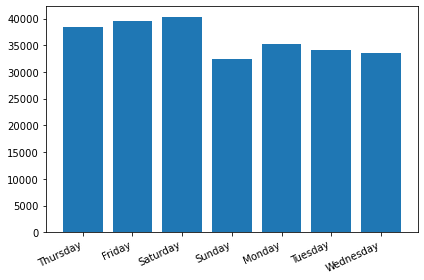

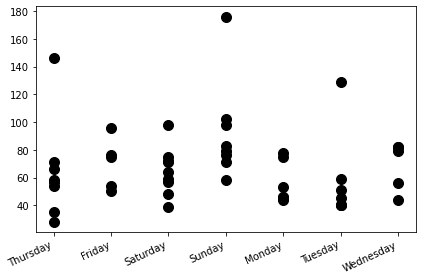

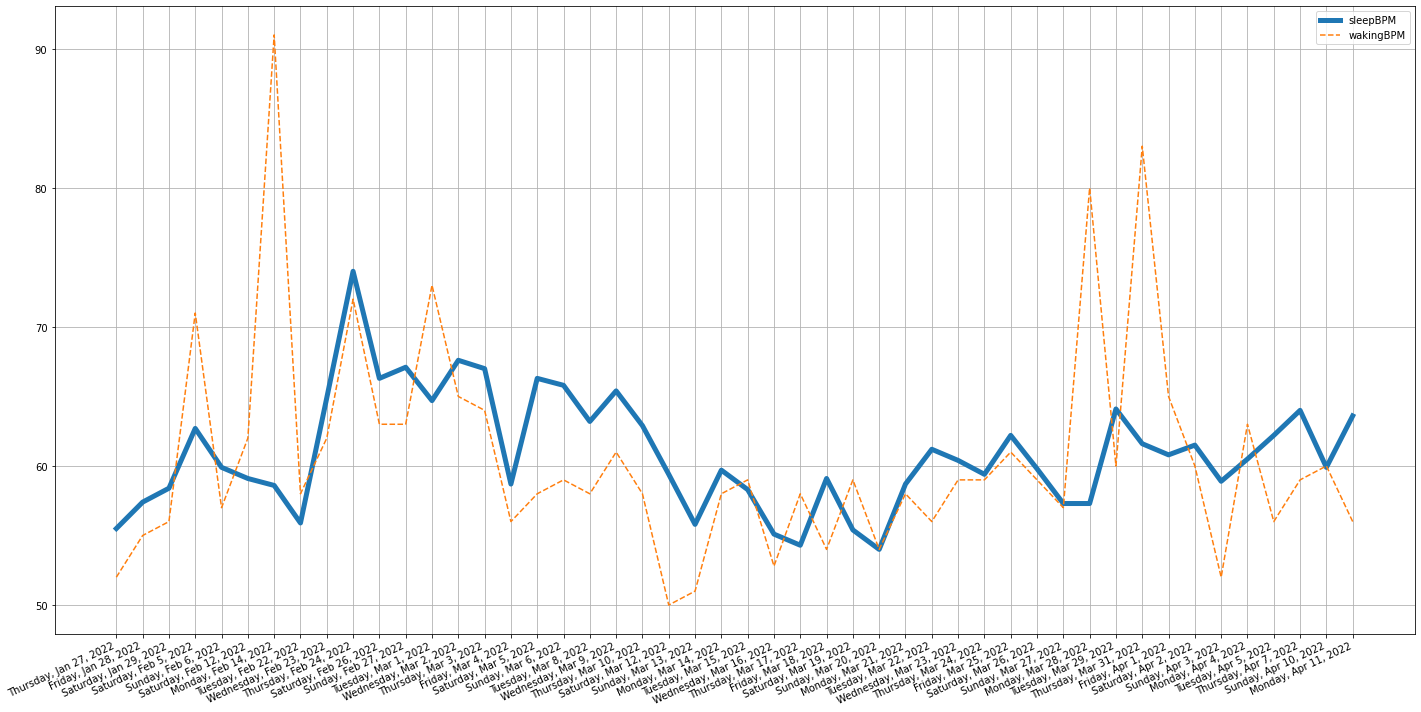

In [619]:
import matplotlib.pyplot as plt


utils.bar_graph_example(merged_df['Day'], merged_df['asleep'])

utils.scatter_chart_example(merged_df['Day'], merged_df['hrv'])

utils.line_chart_example(merged_df['fromDate'], merged_df['efficiency'], merged_df['hrv'], merged_df['asleep'], merged_df['sleepBPM'], merged_df['wakingBPM'],
                        "efficiency", "hrv", "asleep", "sleepBPM", "wakingBPM")


## I really don't think this did anything for me...
# grouped_by_day = merged_df.groupby('Day')
# monday_df = grouped_by_day.get_group("Monday")
# tuesday_df = grouped_by_day.get_group("Tuesday")
# wednesday_df = grouped_by_day.get_group("Wednesday")
# thursday_df = grouped_by_day.get_group("Thursday")
# friday_df = grouped_by_day.get_group("Friday")
# saturday_df = grouped_by_day.get_group("Saturday")
# sunay_df = grouped_by_day.get_group("Sunday")

## KNN Classifier 

* Using the data that I have collected since pulling the original csv as the testing set

In [620]:
# Apply scaling 
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()
df_encoded = merged_df.copy()
test_df_encoded = merged_test.copy()

clean_merged = df_encoded.drop(['fromDate', 'asleep'], axis=1)
clean_test = test_df_encoded.drop(['fromDate', 'asleep'], axis=1)
for col in clean_merged:
    print(col)
    df_encoded[col] = le.fit_transform(clean_merged[col])
    # list(le.classes_,)
    test_df_encoded[col] = le.fit_transform(clean_test[col])
    # le.transform(X_train[col])

X_train = df_encoded.drop(['fromDate','asleep'], axis=1)
y_train = df_encoded['asleep']
print(X_train, y_train, sep="\n")
print(test_df_encoded)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
# typically fit and transform are combined fit_transform()
print(X_train_scaled)
X_test = test_df_encoded.drop(['fromDate','asleep'], axis=1)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

Day
bedtime
waketime
efficiency
quality
sleepBPM
wakingBPM
hrv
    Day  bedtime  waketime  efficiency  quality  sleepBPM  wakingBPM  hrv
0     4        0         0          24       32         4          2   11
1     0        1         1          12       46         8          5   21
2     2        2         2          19       21        10          6   15
3     2        3         3          27       38        26         16   20
4     3        4         4          23       26        18          7   28
5     2        5         5          27       34        14         12   19
6     1        6         6          27       25        11         21   10
7     5        7         7          20       43         6          8    9
8     6        8         8           9       10        33         12   23
9     4        9         9          27        5        40         17   13
10    2       10        10          27        0        36         13   27
11    3       11        11          10       36  

In [629]:
# use kNN!!!
from sklearn.neighbors import KNeighborsClassifier

# train/build/fit
knn_clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_clf.fit(X_train_scaled, y_train)

# # predict
# y_predicted = knn_clf.predict(X_test_scaled)
# print(y_predicted)

ValueError: Unknown label type: 'unknown'